## Import librerias y dataset:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy.interpolate import CubicSpline
import numpy as np

In [23]:
#Dataset original:
df = pd.read_csv("Life Expectancy Data Europe Recodificado.csv")
df.dropna(axis='rows', how='all', inplace=True) # Borra las filas que tengan todos los valores faltantes
df

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0    Austria  2000       0             78.1               94    13.20   
1    Austria  2001       0             78.6               90    12.40   
2    Austria  2002       0             78.7               87    12.50   
3    Austria  2003       0             78.8               86    12.20   
4    Austria  2004       0             79.3               84    12.10   
..       ...   ...     ...              ...              ...      ...   
411   Sweden  2011       0             81.7               58     7.40   
412   Sweden  2012       0             81.7               56     7.40   
413   Sweden  2013       0             81.9               56     7.30   
414   Sweden  2014       0             82.3               55     7.30   
415   Sweden  2015       0             82.4               54     7.13   

     Total expenditure   BMI  Under-five deaths  Percentage expenditure  \
0              2269.13  51.0                  0                    1.60   
1              2282.52  56.0                  0                    1.12   
2              2497.87  51.2                  0                    1.27   
3              3091.24  51.7                  0                    1.48   
4              3594.65  52.2                  0                    1.56   
..                 ...   ...                ...                     ...   
411            6351.22  57.7                  0                   11.70   
412            6254.44  58.1                  0                   11.80   
413            6696.87  58.5                  0                   11.97   
414            6605.91  59.0                  0                   11.93   
415            5598.68  59.5                  0                   10.80   

             GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0    24517.26745      811566                  1.7                 1.9   
1    24489.73553      842293                  1.7                 1.9   
2    26351.37568      881957                  1.7                 1.9   
3     3212.93550     8121423                  1.7                 1.9   
4    36693.42620     8171966                  1.7                 1.9   
..           ...         ...                  ...                 ...   
411  59593.28711     9449213                  1.4                 1.3   
412  57134.77700     9519374                  1.4                 1.3   
413   6283.24522       96379                  1.4                 1.3   
414   5918.19898      969611                  1.5                 1.3   
415   5585.25847     9799186                  1.5                 1.4   

     Income composition of resources  Schooling  Average temperature  \
0                              0.833       15.4                 7.99   
1                              0.837       15.5                 7.04   
2                              0.847       16.1                 7.74   
3                              0.837       14.7                 7.37   
4                              0.841       14.7                 6.77   
..                               ...        ...                  ...   
411                            0.901       16.0                 4.01   
412                            0.903       15.8                 2.54   
413                            0.904       15.8                 3.37   
414                            0.906       15.8                 4.23   
415                            0.909       15.9                 3.97   

     CO2 Emissions  Cholesterol  Smoking  
0              7.9          3.9     52.3  
1              8.4          3.9      NaN  
2              8.6          3.9      NaN  
3              9.2          3.8      NaN  
4              9.3          3.8      NaN  
..             ...          ...      ...  
411            4.7          3.3      NaN  
412            4.4          3.3      NaN  
413            4.2          3.3      NaN  
414            4.0          3.3      NaN  
415         

## Interpolar los valores faltantes de Smoking y hacer regresion lineal:

In [24]:
df_Smoking = df.interpolate(method='polynomial', order=2)
df_Smoking

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0    Austria  2000       0             78.1               94    13.20   
1    Austria  2001       0             78.6               90    12.40   
2    Austria  2002       0             78.7               87    12.50   
3    Austria  2003       0             78.8               86    12.20   
4    Austria  2004       0             79.3               84    12.10   
..       ...   ...     ...              ...              ...      ...   
411   Sweden  2011       0             81.7               58     7.40   
412   Sweden  2012       0             81.7               56     7.40   
413   Sweden  2013       0             81.9               56     7.30   
414   Sweden  2014       0             82.3               55     7.30   
415   Sweden  2015       0             82.4               54     7.13   

     Total expenditure   BMI  Under-five deaths  Percentage expenditure  \
0              2269.13  51.0                  0                    1.60   
1              2282.52  56.0                  0                    1.12   
2              2497.87  51.2                  0                    1.27   
3              3091.24  51.7                  0                    1.48   
4              3594.65  52.2                  0                    1.56   
..                 ...   ...                ...                     ...   
411            6351.22  57.7                  0                   11.70   
412            6254.44  58.1                  0                   11.80   
413            6696.87  58.5                  0                   11.97   
414            6605.91  59.0                  0                   11.93   
415            5598.68  59.5                  0                   10.80   

             GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0    24517.26745      811566                  1.7                 1.9   
1    24489.73553      842293                  1.7                 1.9   
2    26351.37568      881957                  1.7                 1.9   
3     3212.93550     8121423                  1.7                 1.9   
4    36693.42620     8171966                  1.7                 1.9   
..           ...         ...                  ...                 ...   
411  59593.28711     9449213                  1.4                 1.3   
412  57134.77700     9519374                  1.4                 1.3   
413   6283.24522       96379                  1.4                 1.3   
414   5918.19898      969611                  1.5                 1.3   
415   5585.25847     9799186                  1.5                 1.4   

     Income composition of resources  Schooling  Average temperature  \
0                              0.833       15.4                 7.99   
1                              0.837       15.5                 7.04   
2                              0.847       16.1                 7.74   
3                              0.837       14.7                 7.37   
4                              0.841       14.7                 6.77   
..                               ...        ...                  ...   
411                            0.901       16.0                 4.01   
412                            0.903       15.8                 2.54   
413                            0.904       15.8                 3.37   
414                            0.906       15.8                 4.23   
415                            0.909       15.9                 3.97   

     CO2 Emissions  Cholesterol    Smoking  
0              7.9          3.9  52.300000  
1              8.4          3.9  50.363153  
2              8.6          3.9  48.544729  
3              9.2          3.8  46.844729  
4              9.3          3.8  45.263153  
..             ...          ...        ...  
411            4.7          3.3  31.720217  
412            4.4          3.3  30.990325  
413            4.2          3.3  30.110325  
414            4.0          3.3  29

Smoking:
Slope: -0.20
Intercept: 85.13
Rvalue: -0.46
Pvalue: 0.00
Stderr: 0.02
Regression line: y=85.13-0.20x, r=-0.46


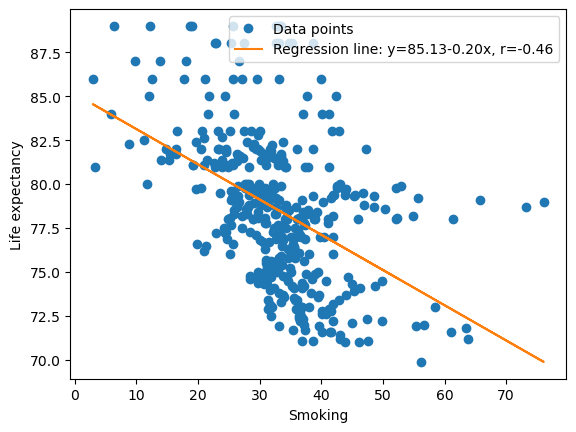

In [25]:
X = df_Smoking['Smoking']
y = df_Smoking['Life expectancy']
print('Smoking:')
result = scipy.stats.linregress(X, y)
print(f'Slope: {result.slope:.2f}')
print(f'Intercept: {result.intercept:.2f}')
print(f'Rvalue: {result.rvalue:.2f}')
print(f'Pvalue: {result.pvalue:.2f}')
print(f'Stderr: {result.stderr:.2f}')

slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(X, y, linewidth=0, marker='o', label='Data points')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('Smoking')
ax.set_ylabel('Life expectancy')
ax.legend(facecolor='white')
plt.show()

## Regresion lineal de las variables restantes:

Schooling:
Slope: 1.30
Intercept: 58.12
Rvalue: 0.42
Pvalue: 0.00
Stderr: 0.14
Regression line: y=58.121.30x, r=0.42


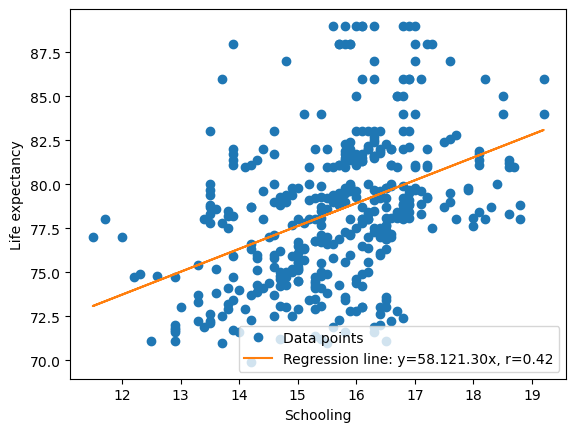

Average temperature:
Slope: 0.17
Intercept: 76.81
Rvalue: 0.14
Pvalue: 0.00
Stderr: 0.06
Regression line: y=76.810.17x, r=0.14


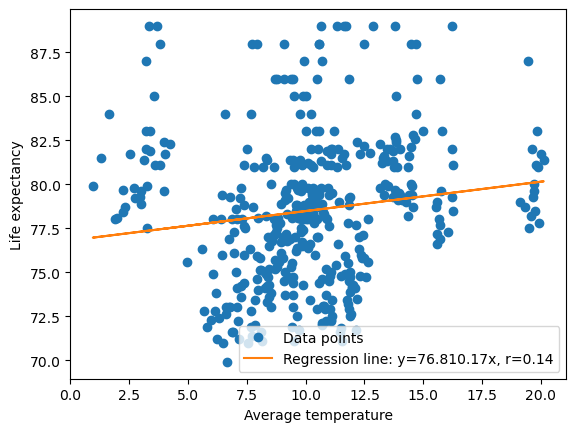

Status:
Slope: 1.50
Intercept: 78.28
Rvalue: 0.13
Pvalue: 0.01
Stderr: 0.56
Regression line: y=78.281.50x, r=0.13


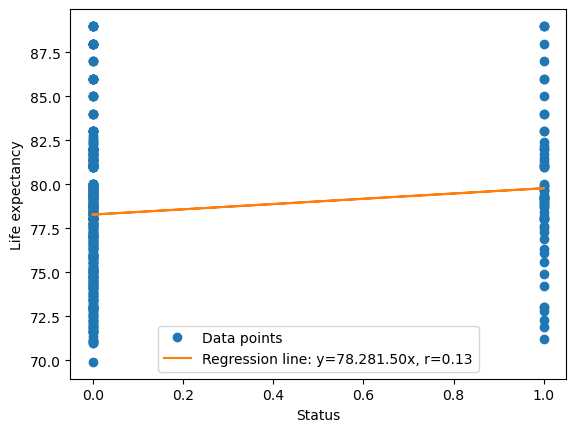

Under-five deaths:
Slope: 0.17
Intercept: 78.36
Rvalue: 0.05
Pvalue: 0.30
Stderr: 0.17
Regression line: y=78.360.17x, r=0.05


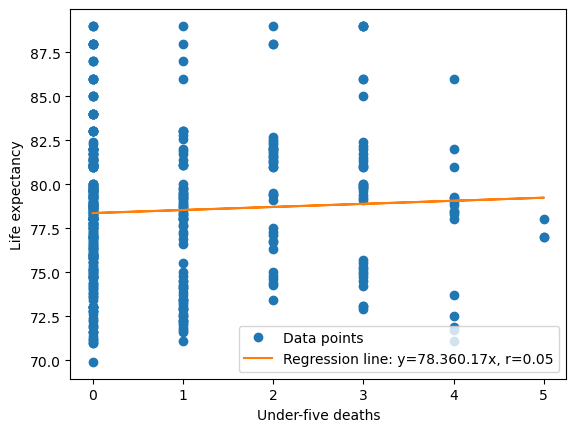

Adult Mortality:
Slope: -0.07
Intercept: 86.42
Rvalue: -0.79
Pvalue: 0.00
Stderr: 0.00
Regression line: y=86.42-0.07x, r=-0.79


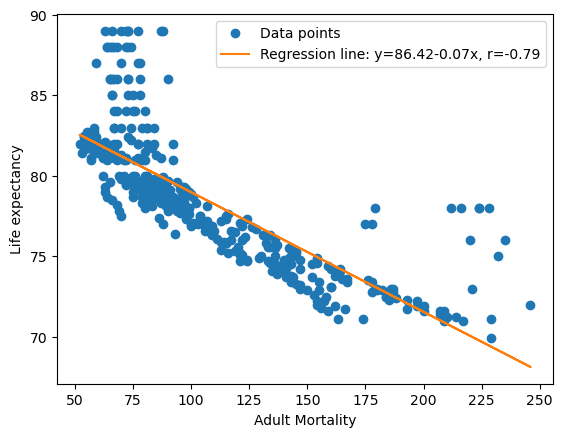

BMI:
Slope: 0.26
Intercept: 63.33
Rvalue: 0.26
Pvalue: 0.00
Stderr: 0.05
Regression line: y=63.330.26x, r=0.26


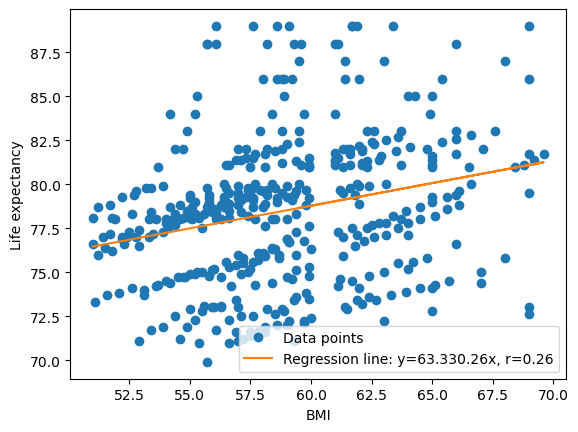

Population:
Slope: 0.00
Intercept: 78.17
Rvalue: 0.16
Pvalue: 0.00
Stderr: 0.00
Regression line: y=78.170.00x, r=0.16


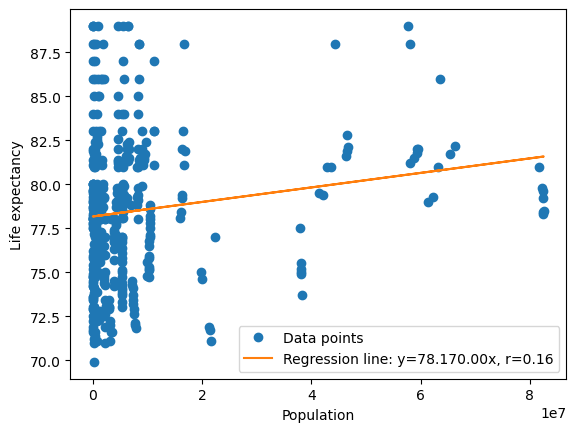

Thinness 5-9 years:
Slope: -3.22
Intercept: 83.10
Rvalue: -0.66
Pvalue: 0.00
Stderr: 0.18
Regression line: y=83.10-3.22x, r=-0.66


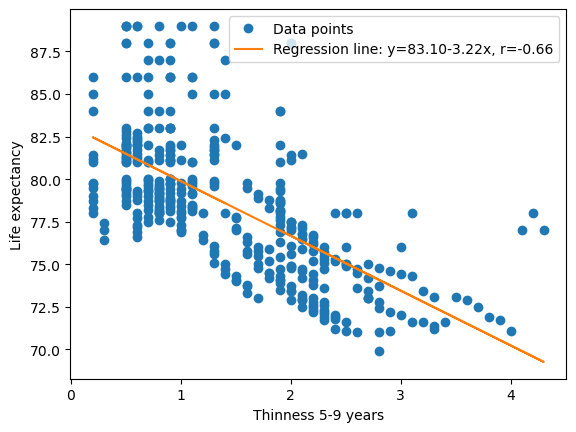

Thinness 1-19 years:
Slope: -3.63
Intercept: 83.69
Rvalue: -0.67
Pvalue: 0.00
Stderr: 0.20
Regression line: y=83.69-3.63x, r=-0.67


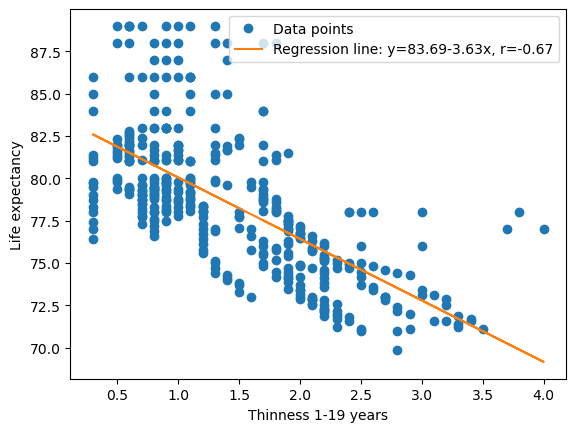

Total expenditure:
Slope: 0.00
Intercept: 74.80
Rvalue: 0.70
Pvalue: 0.00
Stderr: 0.00
Regression line: y=74.800.00x, r=0.70


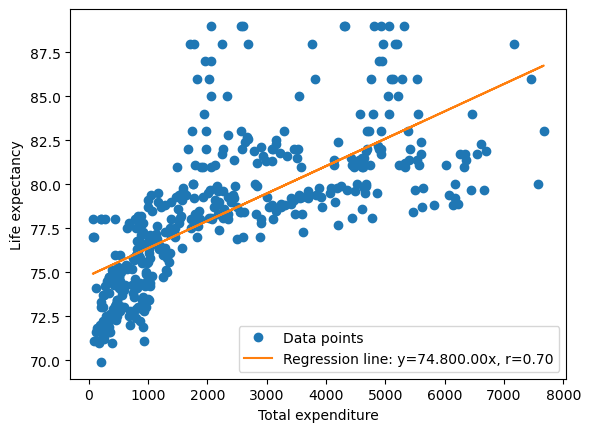

Alcohol:
Slope: -0.53
Intercept: 84.28
Rvalue: -0.27
Pvalue: 0.00
Stderr: 0.09
Regression line: y=84.28-0.53x, r=-0.27


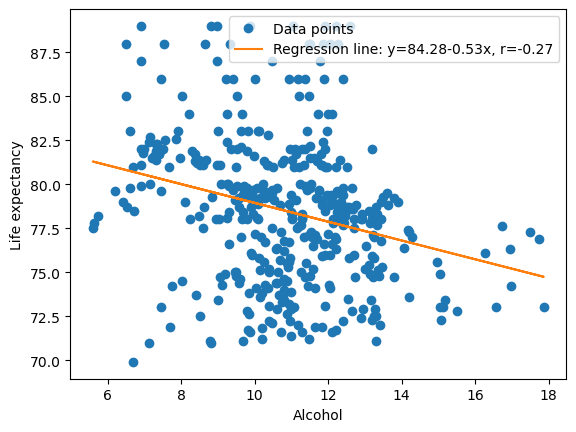

Year:
Slope: 0.32
Intercept: -564.82
Rvalue: 0.36
Pvalue: 0.00
Stderr: 0.04
Regression line: y=-564.820.32x, r=0.36


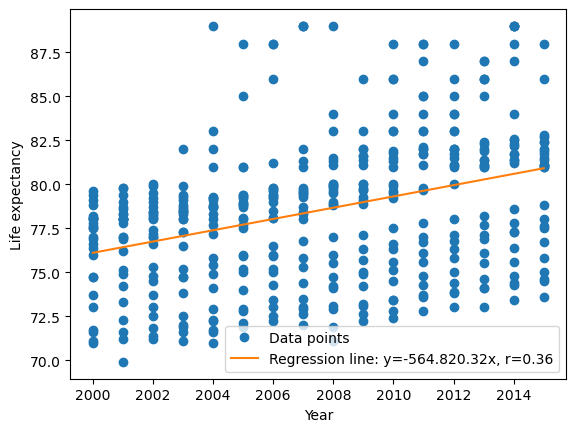

CO2 Emissions:
Slope: 0.20
Intercept: 76.92
Rvalue: 0.18
Pvalue: 0.00
Stderr: 0.05
Regression line: y=76.920.20x, r=0.18


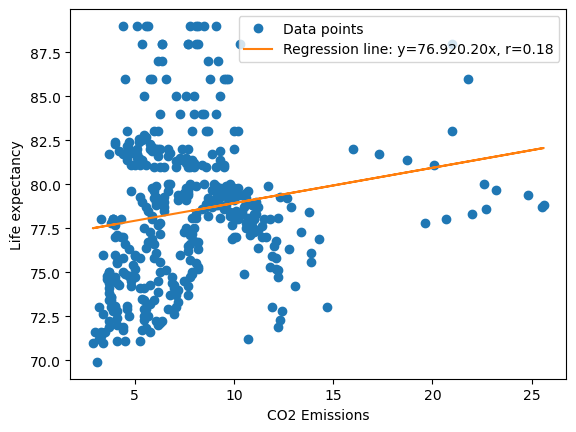

Cholesterol:
Slope: -12.29
Intercept: 123.04
Rvalue: -0.57
Pvalue: 0.00
Stderr: 0.87
Regression line: y=123.04-12.29x, r=-0.57


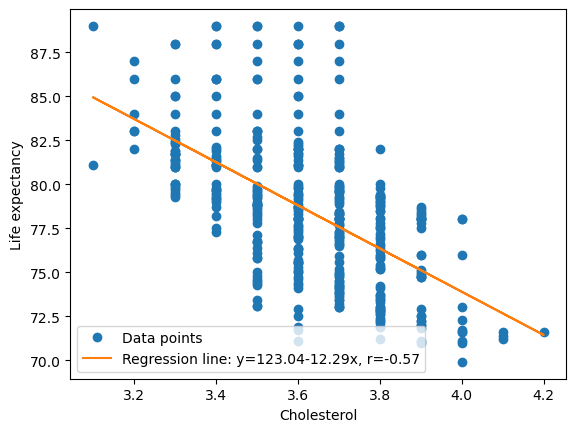

Percentage expenditure:
Slope: 0.25
Intercept: 76.67
Rvalue: 0.15
Pvalue: 0.00
Stderr: 0.08
Regression line: y=76.670.25x, r=0.15


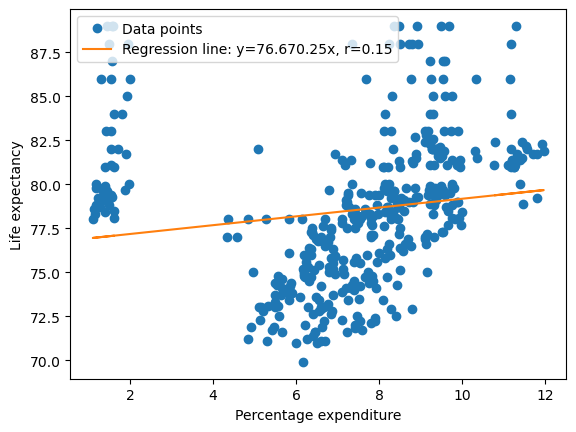

GDP:
Slope: 0.00
Intercept: 77.03
Rvalue: 0.37
Pvalue: 0.00
Stderr: 0.00
Regression line: y=77.030.00x, r=0.37


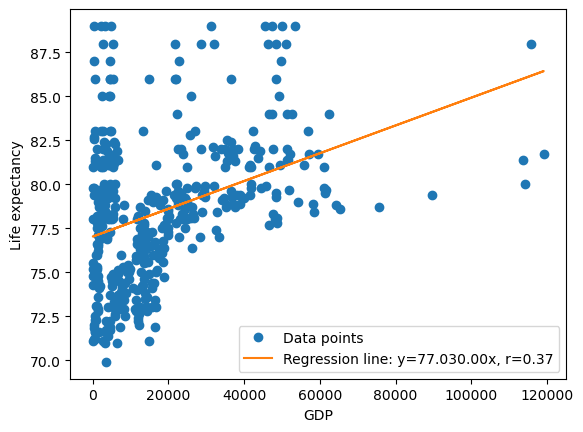

Income composition of resources:
Slope: 60.07
Intercept: 27.98
Rvalue: 0.70
Pvalue: 0.00
Stderr: 3.04
Regression line: y=27.9860.07x, r=0.70


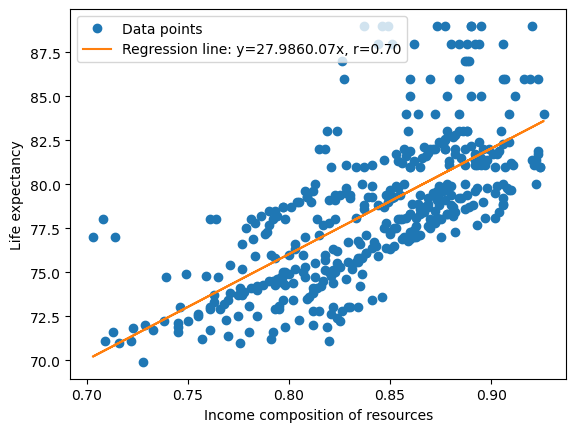

In [26]:
df = df.drop('Smoking',axis=1)
df = df.drop('Country',axis=1)
variables_set = set(df.columns)
for variable in variables_set:
    if variable == "Life expectancy":
        pass
    else:
        X = df[variable]
        y = df['Life expectancy']
        print(f'{variable}:')
        result = scipy.stats.linregress(X, y)
        print(f'Slope: {result.slope:.2f}')
        print(f'Intercept: {result.intercept:.2f}')
        print(f'Rvalue: {result.rvalue:.2f}')
        print(f'Pvalue: {result.pvalue:.2f}')
        print(f'Stderr: {result.stderr:.2f}')

        slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
        line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
        print(line)

        fig, ax = plt.subplots()
        ax.plot(X, y, linewidth=0, marker='o', label='Data points')
        ax.plot(X, intercept + slope * X, label=line)
        ax.set_xlabel(variable)
        ax.set_ylabel('Life expectancy')
        ax.legend(facecolor='white')
        plt.show()

In [27]:
df2 = df_Smoking.drop('Country', axis=1)
for column in df2:
    df2[f'{column}_log'] = np.log10(df2[column])
    df2_log = df2.iloc[:,19:38]
df2_log

C:\Users\arche\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\arche\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Year_log  Status_log  Life expectancy_log  Adult Mortality_log  \
0    3.301030        -inf             1.892651             1.973128   
1    3.301247        -inf             1.895423             1.954243   
2    3.301464        -inf             1.895975             1.939519   
3    3.301681        -inf             1.896526             1.934498   
4    3.301898        -inf             1.899273             1.924279   
..        ...         ...                  ...                  ...   
411  3.303412        -inf             1.912222             1.763428   
412  3.303628        -inf             1.912222             1.748188   
413  3.303844        -inf             1.913284             1.748188   
414  3.304059        -inf             1.915400             1.740363   
415  3.304275        -inf             1.915927             1.732394   

     Alcohol_log  Total expenditure_log   BMI_log  Under-five deaths_log  \
0       1.120574               3.355859  1.707570                   -inf   
1       1.093422               3.358415  1.748188                   -inf   
2       1.096910               3.397570  1.709270                   -inf   
3       1.086360               3.490133  1.713491                   -inf   
4       1.082785               3.555657  1.717671                   -inf   
..           ...                    ...       ...                    ...   
411     0.869232               3.802857  1.761176                   -inf   
412     0.869232               3.796188  1.764176                   -inf   
413     0.863323               3.825872  1.767156                   -inf   
414     0.863323               3.819933  1.770852                   -inf   
415     0.853090               3.748086  1.774517                   -inf   

     Percentage expenditure_log   GDP_log  Population_log  \
0                      0.204120  4.389472        5.909324   
1                      0.049218  4.388984        5.925463   
2                      0.103804  4.420803        5.945447   
3                      0.170262  3.506902        6.909632   
4                      0.193125  4.564588        6.912327   
..                          ...       ...             ...   
411                    1.068186  4.775197        6.975396   
412                    1.071882  4.756901        6.978608   
413                    1.078094  3.798184        4.983982   
414                    1.076640  3.772190        5.986598   
415                    1.033424  3.747043        6.991190   

     Thinness 1-19 years_log  Thinness 5-9 years_log  \
0                   0.230449                0.278754   
1                   0.230449                0.278754   
2                   0.230449                0.278754   
3                   0.230449                0.278754   
4                   0.230449                0.278754   
..                       ...                     ...   
411                 0.146128                0.113943   
412                 0.146128                0.113943   
413                 0.146128                0.113943   
414                 0.176091                0.113943   
415                 0.176091                0.146128   

     Income composition of resources_log  Schooling_log  \
0                              -0.079355       1.187521   
1                              -0.077275       1.190332   
2                              -0.072117       1.206826   
3                              -0.077275       1.167317   
4                              -0.075204       1.167317   
..                                   ...            ...   
411                            -0.045275       1.204120   
412                            -0.044312       1.198657   
413                            -0.043832       1.198657   
414                            -0.042872       1.198657   
415                            -0.041436       1.201397   

     Average temperature_log  CO2 Emissions_log  Cholesterol_log  Smoking_log  
0                   0.902547           0.897

In [28]:
df2_log.replace([np.inf, -np.inf], np.nan, inplace=True)
df2_log['Status_log'].fillna(0, inplace=True) # inplace=True produce que se modifique el propio dataframe
df2_log['Under-five deaths_log'].fillna(0, inplace=True)
df2_log

Year_log  Status_log  Life expectancy_log  Adult Mortality_log  \
0    3.301030         0.0             1.892651             1.973128   
1    3.301247         0.0             1.895423             1.954243   
2    3.301464         0.0             1.895975             1.939519   
3    3.301681         0.0             1.896526             1.934498   
4    3.301898         0.0             1.899273             1.924279   
..        ...         ...                  ...                  ...   
411  3.303412         0.0             1.912222             1.763428   
412  3.303628         0.0             1.912222             1.748188   
413  3.303844         0.0             1.913284             1.748188   
414  3.304059         0.0             1.915400             1.740363   
415  3.304275         0.0             1.915927             1.732394   

     Alcohol_log  Total expenditure_log   BMI_log  Under-five deaths_log  \
0       1.120574               3.355859  1.707570                    0.0   
1       1.093422               3.358415  1.748188                    0.0   
2       1.096910               3.397570  1.709270                    0.0   
3       1.086360               3.490133  1.713491                    0.0   
4       1.082785               3.555657  1.717671                    0.0   
..           ...                    ...       ...                    ...   
411     0.869232               3.802857  1.761176                    0.0   
412     0.869232               3.796188  1.764176                    0.0   
413     0.863323               3.825872  1.767156                    0.0   
414     0.863323               3.819933  1.770852                    0.0   
415     0.853090               3.748086  1.774517                    0.0   

     Percentage expenditure_log   GDP_log  Population_log  \
0                      0.204120  4.389472        5.909324   
1                      0.049218  4.388984        5.925463   
2                      0.103804  4.420803        5.945447   
3                      0.170262  3.506902        6.909632   
4                      0.193125  4.564588        6.912327   
..                          ...       ...             ...   
411                    1.068186  4.775197        6.975396   
412                    1.071882  4.756901        6.978608   
413                    1.078094  3.798184        4.983982   
414                    1.076640  3.772190        5.986598   
415                    1.033424  3.747043        6.991190   

     Thinness 1-19 years_log  Thinness 5-9 years_log  \
0                   0.230449                0.278754   
1                   0.230449                0.278754   
2                   0.230449                0.278754   
3                   0.230449                0.278754   
4                   0.230449                0.278754   
..                       ...                     ...   
411                 0.146128                0.113943   
412                 0.146128                0.113943   
413                 0.146128                0.113943   
414                 0.176091                0.113943   
415                 0.176091                0.146128   

     Income composition of resources_log  Schooling_log  \
0                              -0.079355       1.187521   
1                              -0.077275       1.190332   
2                              -0.072117       1.206826   
3                              -0.077275       1.167317   
4                              -0.075204       1.167317   
..                                   ...            ...   
411                            -0.045275       1.204120   
412                            -0.044312       1.198657   
413                            -0.043832       1.198657   
414                            -0.042872       1.198657   
415                            -0.041436       1.201397   

     Average temperature_log  CO2 Emissions_log  Cholesterol_log  Smoking_log  
0                   0.902547           0.897

Percentage expenditure_log:
Slope: -0.00
Intercept: 1.90
Rvalue: -0.02
Pvalue: 0.62
Stderr: 0.00
Regression line: y=1.90-0.00x, r=-0.02


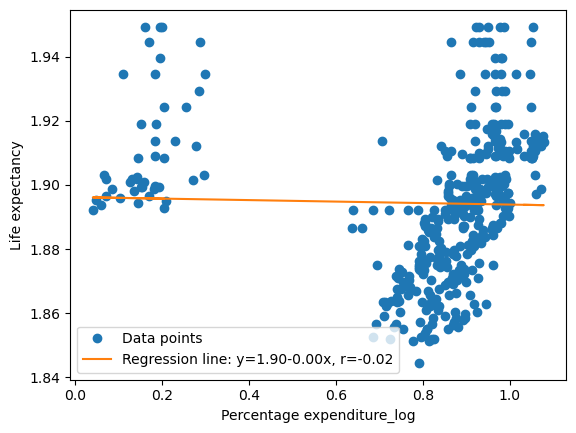

Under-five deaths_log:
Slope: 0.01
Intercept: 1.89
Rvalue: 0.09
Pvalue: 0.06
Stderr: 0.01
Regression line: y=1.890.01x, r=0.09


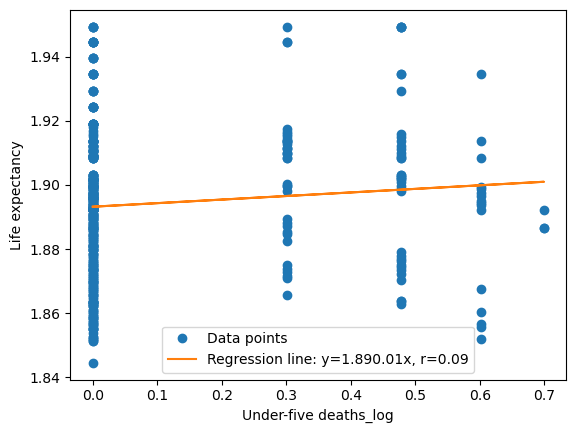

Population_log:
Slope: 0.00
Intercept: 1.87
Rvalue: 0.15
Pvalue: 0.00
Stderr: 0.00
Regression line: y=1.870.00x, r=0.15


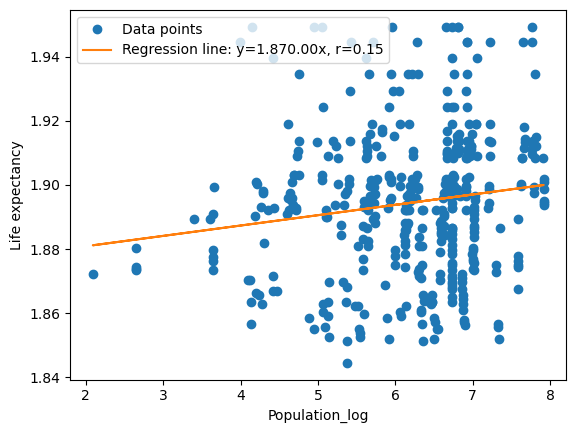

Smoking_log:
Slope: -0.07
Intercept: 2.00
Rvalue: -0.47
Pvalue: 0.00
Stderr: 0.01
Regression line: y=2.00-0.07x, r=-0.47


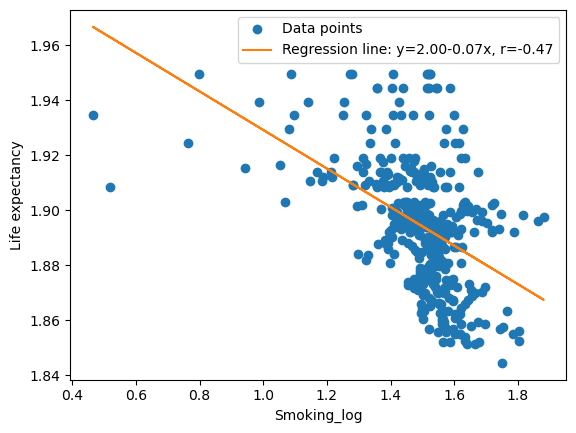

Cholesterol_log:
Slope: -0.56
Intercept: 2.21
Rvalue: -0.57
Pvalue: 0.00
Stderr: 0.04
Regression line: y=2.21-0.56x, r=-0.57


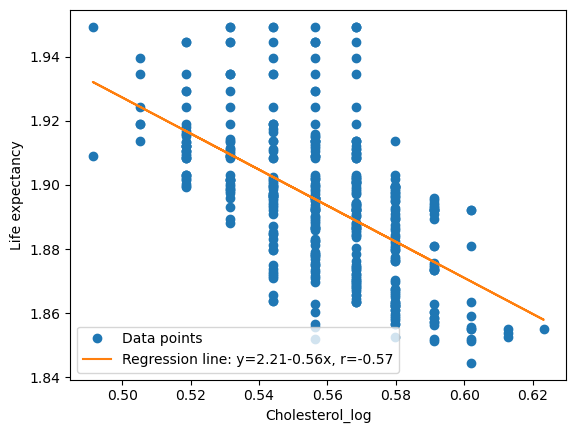

CO2 Emissions_log:
Slope: 0.03
Intercept: 1.87
Rvalue: 0.26
Pvalue: 0.00
Stderr: 0.01
Regression line: y=1.870.03x, r=0.26


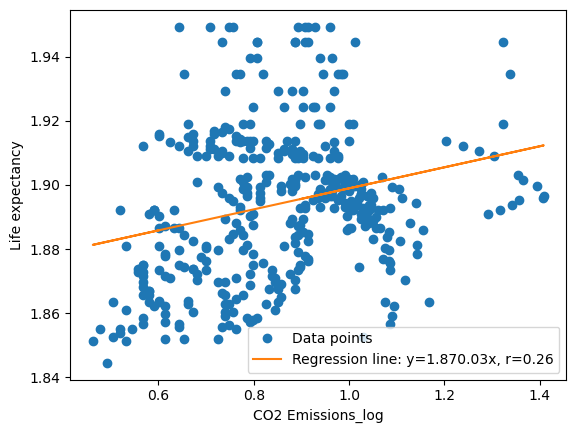

Year_log:
Slope: 8.09
Intercept: -24.83
Rvalue: 0.35
Pvalue: 0.00
Stderr: 1.05
Regression line: y=-24.838.09x, r=0.35


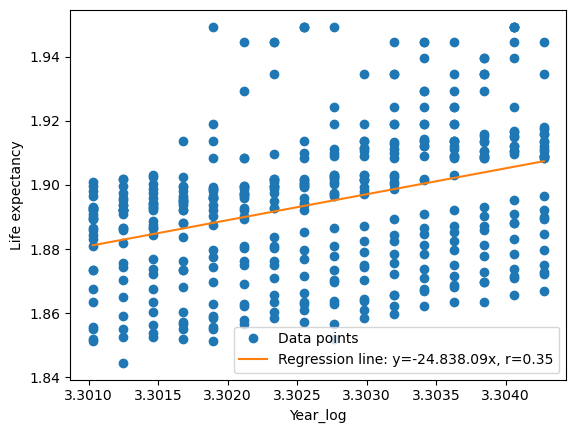

Thinness 1-19 years_log:
Slope: -0.06
Intercept: 1.90
Rvalue: -0.63
Pvalue: 0.00
Stderr: 0.00
Regression line: y=1.90-0.06x, r=-0.63


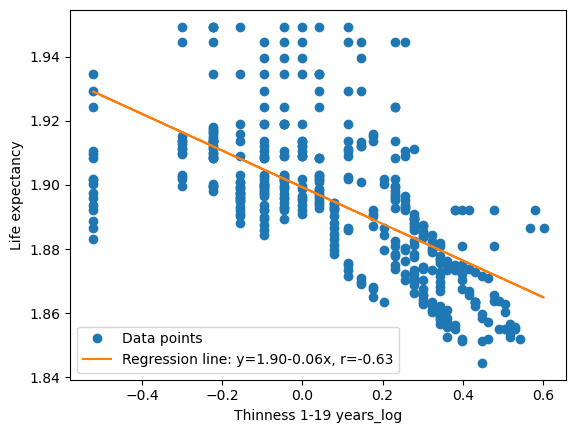

Adult Mortality_log:
Slope: -0.12
Intercept: 2.12
Rvalue: -0.83
Pvalue: 0.00
Stderr: 0.00
Regression line: y=2.12-0.12x, r=-0.83


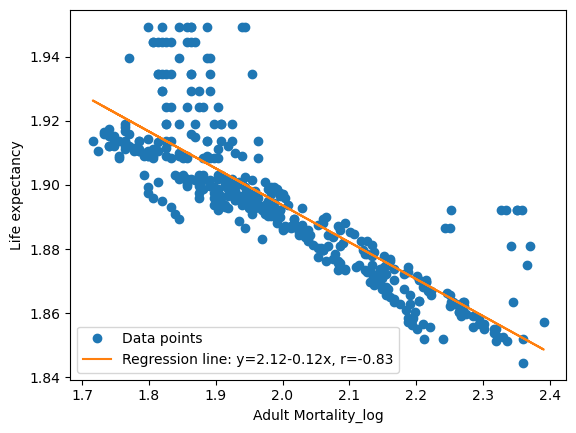

BMI_log:
Slope: 0.19
Intercept: 1.55
Rvalue: 0.26
Pvalue: 0.00
Stderr: 0.04
Regression line: y=1.550.19x, r=0.26


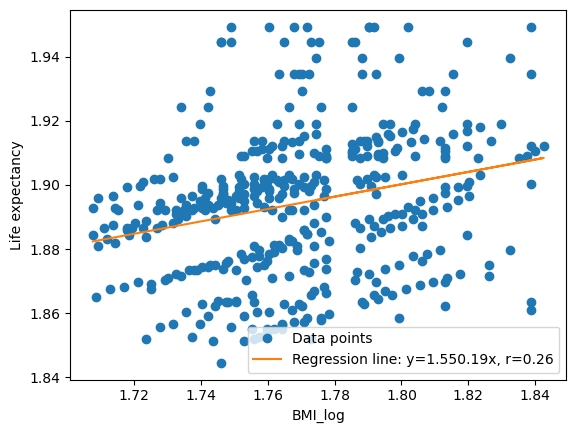

Alcohol_log:
Slope: -0.07
Intercept: 1.96
Rvalue: -0.27
Pvalue: 0.00
Stderr: 0.01
Regression line: y=1.96-0.07x, r=-0.27


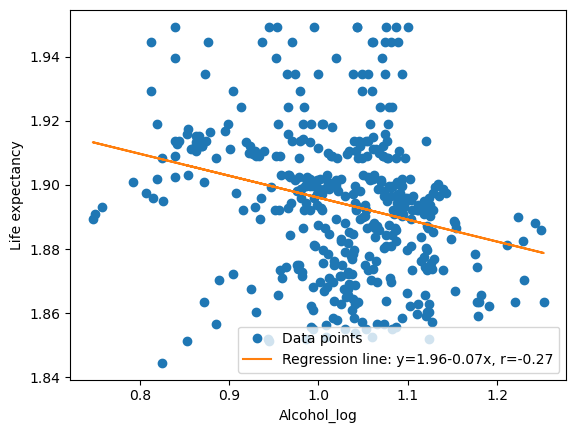

Total expenditure_log:
Slope: 0.04
Intercept: 1.77
Rvalue: 0.77
Pvalue: 0.00
Stderr: 0.00
Regression line: y=1.770.04x, r=0.77


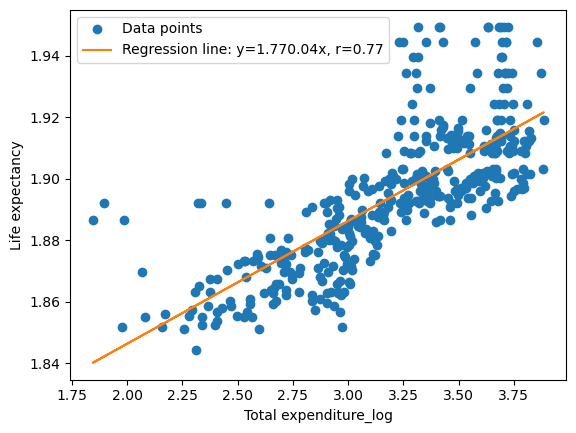

Average temperature_log:
Slope: 0.01
Intercept: 1.89
Rvalue: 0.05
Pvalue: 0.33
Stderr: 0.01
Regression line: y=1.890.01x, r=0.05


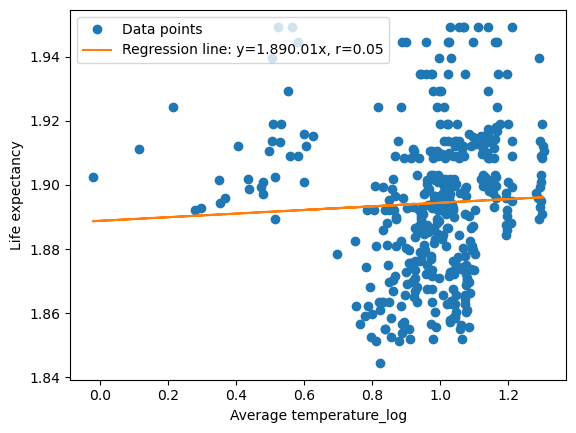

Schooling_log:
Slope: 0.25
Intercept: 1.59
Rvalue: 0.42
Pvalue: 0.00
Stderr: 0.03
Regression line: y=1.590.25x, r=0.42


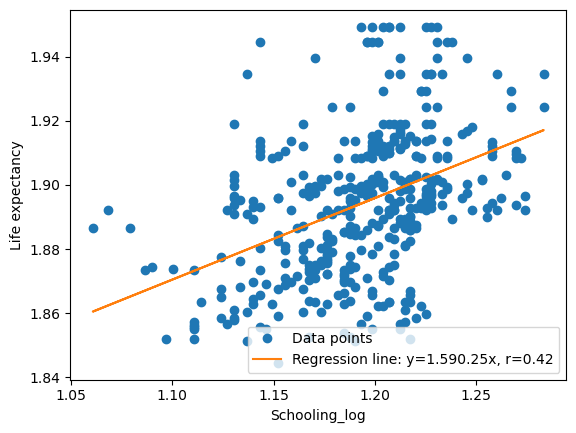

GDP_log:
Slope: 0.01
Intercept: 1.86
Rvalue: 0.28
Pvalue: 0.00
Stderr: 0.00
Regression line: y=1.860.01x, r=0.28


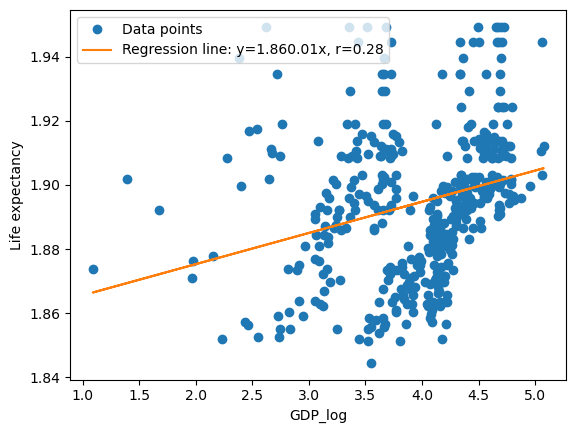

Income composition of resources_log:
Slope: 0.63
Intercept: 1.94
Rvalue: 0.70
Pvalue: 0.00
Stderr: 0.03
Regression line: y=1.940.63x, r=0.70


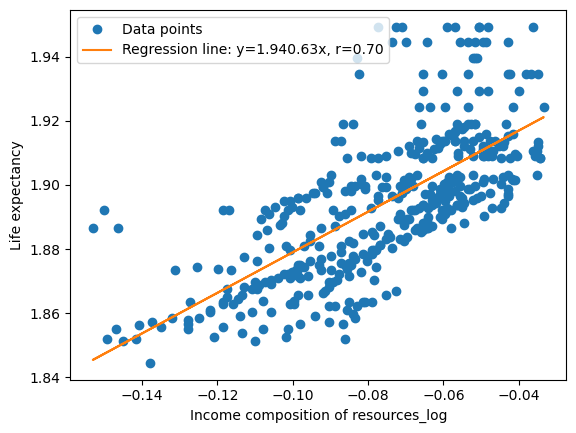

Thinness 5-9 years_log:
Slope: -0.05
Intercept: 1.90
Rvalue: -0.62
Pvalue: 0.00
Stderr: 0.00
Regression line: y=1.90-0.05x, r=-0.62


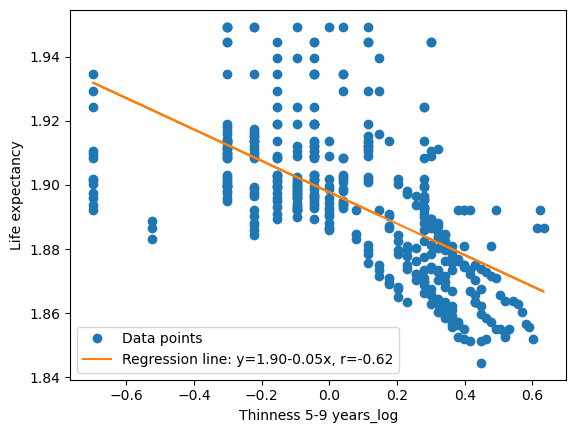

In [35]:
df = df2_log.drop('Smoking_log',axis=1)
df = df2_log.drop('Status_log',axis=1)
variables_set = set(df.columns)
for variable in variables_set:
    if variable == "Life expectancy_log":
        pass
    else:
        X = df[variable]
        y = df['Life expectancy_log']
        print(f'{variable}:')
        result = scipy.stats.linregress(X, y)
        print(f'Slope: {result.slope:.2f}')
        print(f'Intercept: {result.intercept:.2f}')
        print(f'Rvalue: {result.rvalue:.2f}')
        print(f'Pvalue: {result.pvalue:.2f}')
        print(f'Stderr: {result.stderr:.2f}')

        slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
        line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
        print(line)

        fig, ax = plt.subplots()
        ax.plot(X, y, linewidth=0, marker='o', label='Data points')
        ax.plot(X, intercept + slope * X, label=line)
        ax.set_xlabel(variable)
        ax.set_ylabel('Life expectancy')
        ax.legend(facecolor='white')
        plt.show()

Smoking:
Slope: -0.07
Intercept: 2.00
Rvalue: -0.47
Pvalue: 0.00
Stderr: 0.01
Regression line: y=2.00-0.07x, r=-0.47


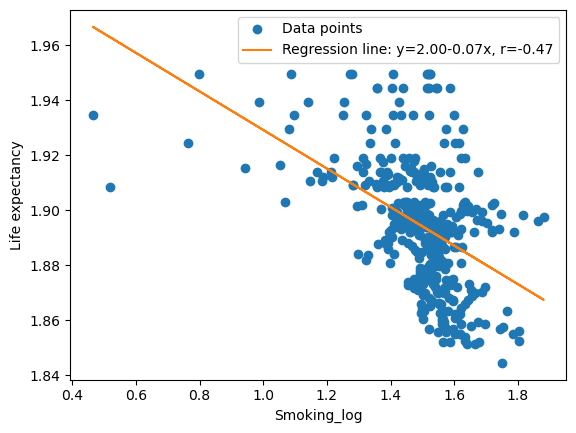

In [36]:
X = df2_log['Smoking_log']
y = df2_log['Life expectancy_log']
print('Smoking:')
result = scipy.stats.linregress(X, y)
print(f'Slope: {result.slope:.2f}')
print(f'Intercept: {result.intercept:.2f}')
print(f'Rvalue: {result.rvalue:.2f}')
print(f'Pvalue: {result.pvalue:.2f}')
print(f'Stderr: {result.stderr:.2f}')

slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(X, y, linewidth=0, marker='o', label='Data points')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('Smoking_log')
ax.set_ylabel('Life expectancy')
ax.legend(facecolor='white')
plt.show()